In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [10]:
path="./dataset/"
file='Cor_descriptor.pkl'
df= pd.read_pickle(path+file)
df

ID        TC Monomer_length  MW_ratio Mass_max Mass_ave K_bond_min  \
0        PI1  0.456185           2.58         1   12.011  4.67567     218.51   
1        PI2  0.258773            2.6  0.666667   12.011  4.67567     218.51   
2        PI3  0.264363           2.65       0.5   12.011  4.67567     218.51   
3        PI4  0.261131           2.59       0.4   12.011  4.67567     218.51   
4        PI5  0.234342           2.76       0.4   12.011  4.67567     218.51   
...      ...       ...            ...       ...      ...      ...        ...   
1046  PI1134  0.239876          19.74  0.745552   18.998  9.71751     232.52   
1047  PI1135  0.248861          19.43  0.745552   18.998  9.71751     232.52   
1048  PI1136  0.208098          15.11         1   32.067  8.37947     209.78   
1049  PI1137  0.199093           5.34         1   32.067  10.7818     209.78   
1050  PI1138  0.226688           5.03  0.750083   15.999  7.06771     250.32   

     K_bond_ave K_ang_ave Theta0_min  ...      Mor19     Mor31 SMR_VSA1  \
0       325.817    48.657       88.4  ...   0.205252  0.101002        0   
1        326.68   49.1032       88.4  ...   0.421298  0.185377        0   
2        327.04   48.9532       88.4  ...   0.350261  0.245392        0   
3       327.256   48.8663       88.4  ...   0.823443  0.316596        0   
4       327.256   49.2038       88.4  ...   0.819376  0.293415        0   
...         ...       ...        ...  ...        ...       ...      ...   
1046    372.619    69.222     104.88  ...   0.199954  0.654512  26.3425   
1047    372.619    69.222     104.88  ...  0.0888365  0.626717  26.3425   
1048    377.212   62.7439     102.44  ...    1.14708  0.788496  16.8356   
1049    398.584   67.9282     104.44  ...  -0.108499  0.326322   8.4178   
1050    367.916   57.3668     107.58  ...  0.0672052  0.086131  5.10653   

     SMR_VSA3 SlogP_VSA5 SlogP_VSA10 EState_VSA1 EState_VSA5 VSA_EState4  \
0           0          0           0           0           0           0   
1           0    6.92374           0           0     6.42082           0   
2           0    13.3446           0           0     12.8416           0   
3           0    19.7654           0           0     12.8416           0   
4           0    13.8475           0           0     6.42082           0   
...       ...        ...         ...         ...         ...         ...   
1046  19.9359    11.1269     26.3425     28.8945     24.2655   -0.487784   
1047  19.9359    11.1269     26.3425     28.8945     24.2655   -0.466391   
1048  9.44419    25.6833           0     20.9135           0           0   
1049        0          0           0     10.7042     6.06637           0   
1050        0    11.1269           0           0      24.117     2.77231   

     VSA_EState7  
0              0  
1        1.24537  
2        2.79977  
3        4.32787  
4        1.26389  
...          ...  
1046    -10.1832  
1047     -10.182  
1048     3.32871  
1049           0  
1050           0  

[1051 rows x 55 columns]

In [11]:
X_all=df.drop(df.columns[0:2], axis=1)
y_all=df["TC"]
for i in [X_all,y_all]:
    i.index = range(i.shape[0])
scaler.fit(X_all)
X = scaler.transform(X_all)

In [14]:
#Bayesian optimized hyperparameters
n_estimator = int(411.07423627934196)
max_depths = int(16.808976918640724)
min_samples_split=int(np.round(3.530568310298654))
min_samples_leaf=int(np.round(3.7540007963006756))
print(n_estimator,max_depths,min_samples_split,min_samples_leaf)

411 16 4 4


In [15]:
rf = RandomForestRegressor(n_estimators = n_estimator, max_features='auto',random_state=1, max_depth = max_depths,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

In [16]:
def get_models():
    models = dict()
    for i in range(10, 54):
        rfe = RFE(estimator=rf, n_features_to_select=i)
        model =rf
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [17]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv =RepeatedKFold(n_splits=10, n_repeats=1,random_state=1)
    scores = cross_val_score(model,X,y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    scores_mse=cross_val_score(model,X,y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores,scores_mse

In [18]:
models = get_models()
# evaluate the models and store results
results,MSE,names = list(), list(), list()
for name, model in models.items():
    scores,scores_mse = evaluate_model(model, X, y_all)
    results.append(scores)
    MSE.append(scores)
    names.append(scores_mse)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.617 (0.137)
>11 0.617 (0.136)
>12 0.618 (0.137)
>13 0.621 (0.140)
>14 0.627 (0.134)
>15 0.632 (0.135)
>16 0.636 (0.133)
>17 0.637 (0.134)
>18 0.636 (0.131)
>19 0.637 (0.131)
>20 0.638 (0.132)
>21 0.640 (0.131)
>22 0.643 (0.131)
>23 0.643 (0.133)
>24 0.646 (0.134)
>25 0.651 (0.133)
>26 0.654 (0.130)
>27 0.655 (0.132)
>28 0.655 (0.133)
>29 0.657 (0.133)
>30 0.656 (0.133)
>31 0.658 (0.132)
>32 0.657 (0.132)
>33 0.657 (0.133)
>34 0.658 (0.134)
>35 0.659 (0.134)
>36 0.659 (0.135)
>37 0.661 (0.135)
>38 0.661 (0.134)
>39 0.662 (0.134)
>40 0.663 (0.133)
>41 0.664 (0.133)
>42 0.664 (0.133)
>43 0.664 (0.133)
>44 0.663 (0.133)
>45 0.664 (0.133)
>46 0.664 (0.133)
>47 0.664 (0.133)
>48 0.664 (0.133)
>49 0.664 (0.132)
>50 0.664 (0.133)
>51 0.664 (0.133)
>52 0.665 (0.133)
>53 0.664 (0.133)


In [39]:
R2_MEAN=[]
R2_STD=[]
MSE_MEAN=[]
MSE_STD=[]
random_Number=[]
for i in range (0,len(results)):
    R2_MEAN.append(mean(results[i]))
    R2_STD.append(std(results[i])/2)
    MSE_MEAN.append(-1*mean(names[i]))
    MSE_STD.append(std(names[i])/2)
    random_Number.append(i+10)

In [44]:
R2_MEAN=np.array(R2_MEAN)
R2_STD=np.array(R2_STD)
random_Number=np.array(random_Number)
MSE_MEAN=np.array(MSE_MEAN)
MSE_STD=np.array(MSE_STD)

C:\Users\huang\AppData\Local\Temp/ipykernel_69348/125263462.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.subplot()


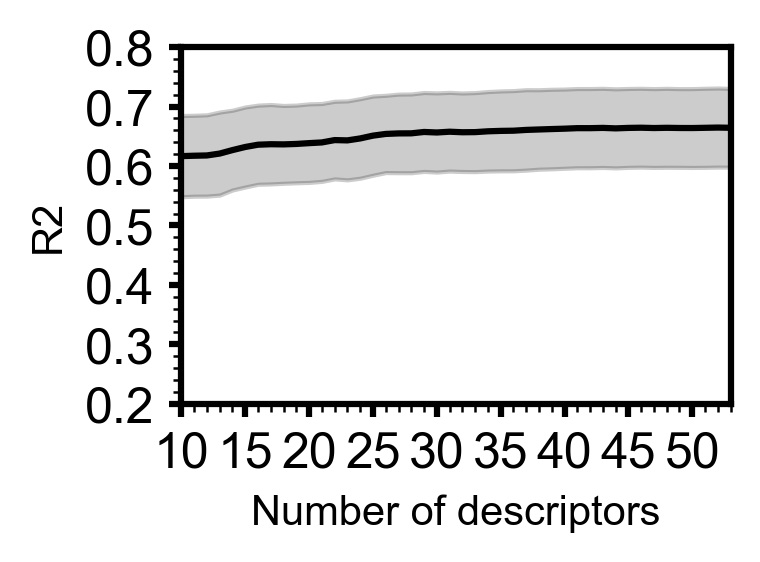

In [53]:
inch2cm=1/2.54
plt.figure(figsize=(6*inch2cm, 4*inch2cm))
plt.rcParams["figure.dpi"] = 300  # 分辨率
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 10,
}

plt.plot(random_Number, R2_MEAN, '-', color='k',label='Random')
plt.fill_between(random_Number,R2_MEAN-R2_STD,R2_MEAN+R2_STD,
                 color='k', alpha=0.2)

plt.xlim(10,53)
plt.ylim(0.2,0.8)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
my_x_ticks = np.arange(10,53,5)
my_y_ticks = np.arange(0.2,0.81,0.1)
plt.xticks(my_x_ticks,size=12)
plt.yticks(my_y_ticks,size=12)
plt.grid(False)
axes = plt.subplot()
axes.minorticks_on()
axes.tick_params(axis="both", which="major", direction="out", width=1.5, length=3)
TK = plt.gca()
bwith = 1.5
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
TK.spines['bottom'].set_color('k')
TK.spines['left'].set_color('k')
TK.spines['top'].set_color('k')
TK.spines['right'].set_color('k')
plt.xlabel("Number of descriptors",fontsize=10)
plt.ylabel("R2",fontsize=10)
plt.show()

C:\Users\huang\AppData\Local\Temp/ipykernel_69348/2868686199.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.subplot()


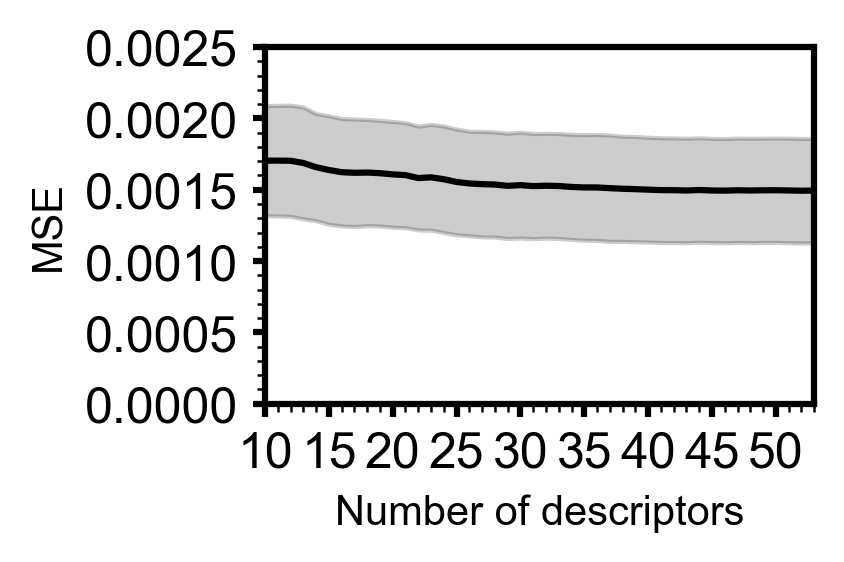

In [54]:
inch2cm=1/2.54
plt.figure(figsize=(6*inch2cm, 4*inch2cm))
plt.rcParams["figure.dpi"] = 300  # 分辨率
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 10,
}
plt.plot(random_Number, MSE_MEAN, '-', color='k',label='Random')
plt.fill_between(random_Number,MSE_MEAN-MSE_STD,MSE_MEAN+MSE_STD,
                 color='k', alpha=0.2)
plt.xlim(10,53)
plt.ylim(0,0.002)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
my_x_ticks = np.arange(10,53,5)
my_y_ticks = np.arange(0,0.003,0.0005)
plt.xticks(my_x_ticks,size=12)
plt.yticks(my_y_ticks,size=12)
plt.grid(False)
axes = plt.subplot()
axes.minorticks_on()
axes.tick_params(axis="both", which="major", direction="out", width=1.5, length=3)
TK = plt.gca()
bwith = 1.5
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
TK.spines['bottom'].set_color('k')
TK.spines['left'].set_color('k')
TK.spines['top'].set_color('k')
TK.spines['right'].set_color('k')
plt.xlabel("Number of descriptors",fontsize=10)
plt.ylabel("MSE",fontsize=10)
plt.show()

In [55]:
rfe = RFE(estimator=rf, n_features_to_select=25)
model = rf
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv =RepeatedKFold(n_splits=10, n_repeats=1,random_state=1)
scores = cross_val_score(model, X, y_all, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
scores_mse=cross_val_score(model,  X, y_all,  scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MSE: %.3f (%.3f)' % (mean(scores_mse), std(scores_mse)))
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))

MSE: -0.001 (0.001)
R2: 0.664 (0.133)


In [56]:
selector =rfe.fit(X, y_all)

In [58]:
sele=selector.ranking_
feature_name=X_all.columns
feature_name

Index(['Monomer_length', 'MW_ratio', 'Mass_max', 'Mass_ave', 'K_bond_min',
       'K_bond_ave', 'K_ang_ave', 'Theta0_min', 'nAtom', 'nH', 'nN', 'nF',
       'nCl', 'AATS0dv', 'AATS0d', 'AATS0Z', 'AATS1Z', 'ATSC2Z', 'ATSC5Z',
       'AATSC0dv', 'AATSC0Z', 'AATSC2Z', 'BCUTdv-1h', 'BCUTd-1h', 'BCUTZ-1h',
       'C1SP2', 'Xc-3d', 'Xc-5d', 'Xc-6d', 'NssssC', 'ETA_eta_B', 'nHBDon',
       'CIC0', 'CIC1', 'MIC0', 'MIC1', 'Kier2', 'Kier3', 'Mor02', 'Mor04',
       'Mor08', 'Mor13', 'Mor14', 'Mor19', 'Mor31', 'SMR_VSA1', 'SMR_VSA3',
       'SlogP_VSA5', 'SlogP_VSA10', 'EState_VSA1', 'EState_VSA5',
       'VSA_EState4', 'VSA_EState7'],
      dtype='object')

In [65]:
Opt_desc=[]
for i in range (0,len(sele)):
    if sele[i]==1:
        Opt_desc.append(feature_name[i])
df1=df[Opt_desc]
to_save=df[["ID","TC"]].join(df1)
file1 = r"Opt_descriptor.pkl"
to_save.to_pickle(path+file1)        

In [66]:
to_save

ID        TC Monomer_length  MW_ratio Mass_max Mass_ave K_bond_ave  \
0        PI1  0.456185           2.58         1   12.011  4.67567    325.817   
1        PI2  0.258773            2.6  0.666667   12.011  4.67567     326.68   
2        PI3  0.264363           2.65       0.5   12.011  4.67567     327.04   
3        PI4  0.261131           2.59       0.4   12.011  4.67567    327.256   
4        PI5  0.234342           2.76       0.4   12.011  4.67567    327.256   
...      ...       ...            ...       ...      ...      ...        ...   
1046  PI1134  0.239876          19.74  0.745552   18.998  9.71751    372.619   
1047  PI1135  0.248861          19.43  0.745552   18.998  9.71751    372.619   
1048  PI1136  0.208098          15.11         1   32.067  8.37947    377.212   
1049  PI1137  0.199093           5.34         1   32.067  10.7818    398.584   
1050  PI1138  0.226688           5.03  0.750083   15.999  7.06771    367.916   

     K_ang_ave  nH   AATS0d  ... nHBDon     MIC0     MIC1    Kier3    Mor02  \
0       48.657   4     1.75  ...      0   6.5095   6.5095        4  13.5611   
1      49.1032   6        2  ...      0  6.62105   11.813        4  19.2292   
2      48.9532   8        2  ...      0  6.66736  13.5308        3  21.9293   
3      48.8663  10        2  ...      0  6.69093  13.4804     3.84  24.7537   
4      49.2038  10  2.11765  ...      0  6.69093  13.4804  2.66667  25.6625   
...        ...  ..      ...  ...    ...      ...      ...      ...      ...   
1046    69.222  16  4.42105  ...      2  16.7388  33.6424    5.776  43.1547   
1047    69.222  16  4.42105  ...      2  16.7388  33.6424    5.776  44.1209   
1048   62.7439  18     3.05  ...      2  22.0525   31.724  9.03686  44.7162   
1049   67.9282   4  3.86667  ...      0  21.4168  27.4301      2.5  13.9872   
1050   57.3668   8  3.15789  ...      1  10.4177  23.6121  1.97531  17.8576   

           Mor14      Mor19 SMR_VSA1 SMR_VSA3 VSA_EState4  
0       0.233769   0.205252        0        0           0  
1       0.393246   0.421298        0        0           0  
2       0.675759   0.350261        0        0           0  
3       0.923227   0.823443        0        0           0  
4       0.872534   0.819376        0        0           0  
...          ...        ...      ...      ...         ...  
1046   -0.537266   0.199954  26.3425  19.9359   -0.487784  
1047 -0.00156469  0.0888365  26.3425  19.9359   -0.466391  
1048     1.69004    1.14708  16.8356  9.44419           0  
1049    -0.13399  -0.108499   8.4178        0           0  
1050    0.300494  0.0672052  5.10653        0     2.77231  

[1051 rows x 27 columns]